# <font style="color:rgb(50,120,229)"> Color Spaces</font>

## <font style="color:rgb(50,120,229)"> Overview</font>

In this module, we will cover the following topics.

1. **The RGB color space**
1. **The HSV color space**
1. **The YCrCb color space**
1. **The Lab color space**

# <font style="color:rgb(50,120,229)"> Introduction</font>

Color is a characteristic feature of human visual perception. The retina contains three types of color receptor cells. Thus, three attributes are necessary and sufficient to describe a color completely for the human visual system.

A **color space** is a representation of color using different attributes. The attributes can be the color tint (Hue), saturation and brightness or **<font color=red>Red</font>**, **<font color=green>Green</font>** and **<font color=blue>Blue</font>** or something else. The different attributes are represented along the axes of a 3-dimensional space, so that it is easier to describe them mathematically and find relations among the different color spaces. The major color spaces we will discuss are :

- **RGB**

- **HSV**

Apart from these two, we will also go over the following color spaces in brief.

- **YCrCb**

- **Lab**

# <font style = "color:rgb(50,120,229)"> Why do we need different color spaces?</font>

Different color spaces have been designed to cater to different applications like object segmentation, transmission, displaying, printing etc. Some properties of color spaces are :

- **Device Dependency** - The color is dependent on the device producing it (camera) and the device displaying it (Monitor). Most color spaces are device dependent except for Lab color space, which is designed to be device independent. Please read [**this article**](http://colorremedies.com/articles/2DeviceIndepend.pdf) to gain more insight into this.

- **Intuitiveness** - It is more intuitive to be able to specify a color as “orange” (which we can do in HSV color space) instead of calling it a mixture of red and green (which we have to do in RGB color space).

- **Perceptual uniformity** - A small change in the value of a particular attribute should result in a proportional change in perception of that attribute. The Lab color space is designed to have perceptual uniformity. The RGB color space is highly non-uniform in this aspect.

#### <font style = "color:rgb(8,133,37)">NOTE </font>
It should be noted that the choice of color space depends largely on the problem you are trying to solve. Given a problem, you should always try and experiment with different color spaces for arriving at the desired solution. We will use the following image to illustrate various aspects of the color spaces.

![Example Image](https://www.dropbox.com/s/ha32y59tnipk2vg/Bellpepper.jpg?dl=1)

# <font style = "color:rgb(50,120,229)">The RGB color space</font>
The RGB color space is an additive color space in which Red, Green and Blue light rays are added in various proportions to produce different colors. It is the most commonly used color space in image processing.

![Illustration of RGB as an additive color space](https://www.dropbox.com/s/8yntkhndjhe5si2/RGBcolorspace.png?dl=1)

As we have seen earlier, in OpenCV, the image is loaded into BGR format by default. It is the same as RGB, but stored in reverse order. 

For images with 8-bit per channel, the intensity values for a given channel can range from 0 to 255. Brighter pixels signify higher intensity values in a particular channel and vice-versa. The three channels (R, G, B) of our example image are shown below.

In [1]:
# Import module
import cv2
import numpy as np
import os
from dataPath import DATA_PATH

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [4]:
# Path to the image
img = os.path.join(DATA_PATH,"images/capsicum.jpg")

#read the image in BGR format
bgr = cv2.imread(img)

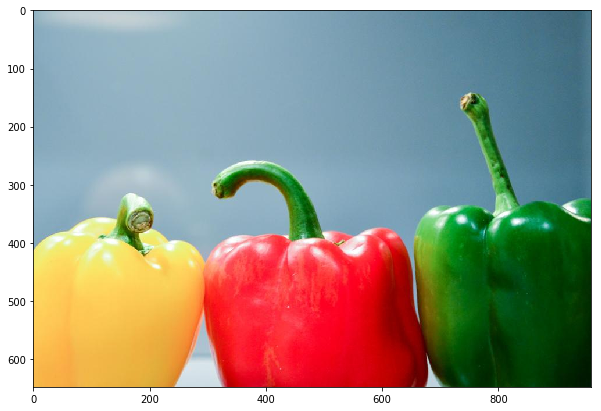

In [5]:
plt.imshow(bgr[:,:,::-1])

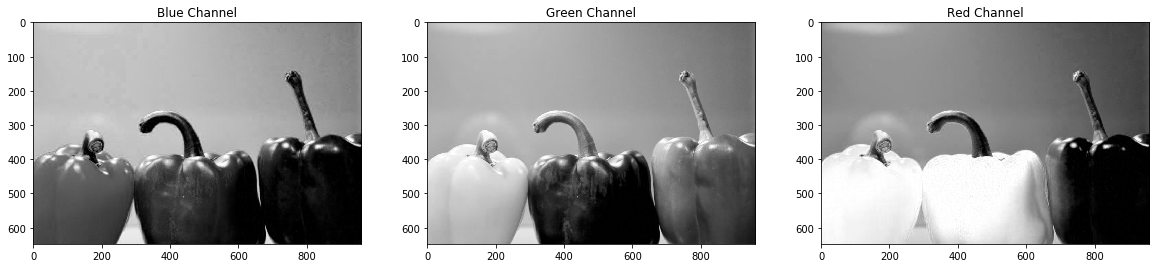

In [6]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(bgr[:,:,0],cmap='gray')
plt.title("Blue Channel");
plt.subplot(132)
plt.imshow(bgr[:,:,1],cmap='gray')
plt.title("Green Channel");
plt.subplot(133)
plt.imshow(bgr[:,:,2],cmap='gray')
plt.title("Red Channel");

In the above figure, it can be seen that the red color (middle pepper) displays high intensity ( bright color) only in the R channel whereas the yellow color (left pepper) has high intensity values in both R and G channels which can be attributed to the additive property of the color space (yellow is a mixture of red and green).

In the RGB color space, all three channels contain information about the color as well as brightness. It is better for some applications if we can separate the color component, also known as ***Chrominance*** , from the lightness or brightness component also known as ***Luminance***. This separation is present in the other color spaces we will talk about next.

# <font style = "color:rgb(50,120,229)">The HSV color space</font>

This is one of the most popular color spaces used in image processing after the RGB color space. Its three components are :

- **Hue** - indicates the color / tint of the pixel

- **Saturation** - indicates the purity (or richness) of the color

- **Value** - indicates the amount of brightness of the pixel

The HSV color space converts the RGB color space from cartesian coordinates (x, y, z) to cylindrical coordinates (ρ, φ, z). It is **more intuitive than the RGB color space** because it separates the color and brightness into different axes. This makes it easier for us to describe any color directly.

Let us first see how to convert an image from BGR to HSV format and display the different channels to get some more insights about them. We will use OpenCV’s [**`cvtColor`**](https://docs.opencv.org/4.1.0/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function for conversion.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.cvtColor(	src, code[, dst[, dstCn]]	)
```

**Parameters**

- **`src`** - input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
- **`dst`** - output image of the same size and depth as src.
- **`code`** - color space conversion code (see ColorConversionCodes).
- **`dstCn`** - number of channels in the destination image; if the parameter is 0, the number of the channels is derived automatically from src and code.


In [8]:
# convert from bgr to HSV format
hsvImage = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

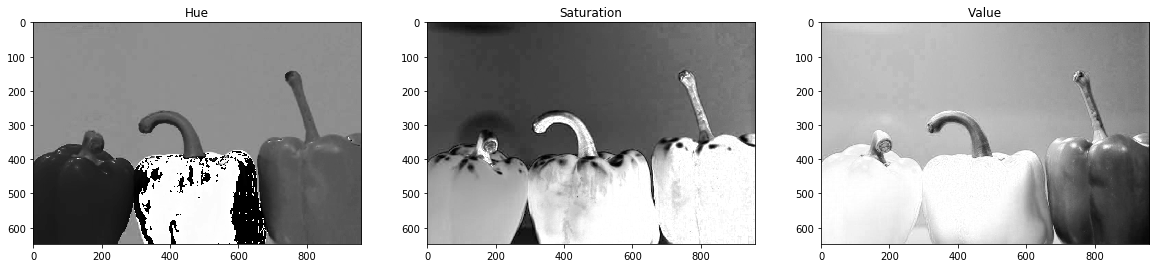

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(hsvImage[:,:,0],cmap='gray')
plt.title("Hue");
plt.subplot(132)
plt.imshow(hsvImage[:,:,1],cmap='gray')
plt.title("Saturation");
plt.subplot(133)
plt.imshow(hsvImage[:,:,2],cmap='gray')
plt.title("Value");

#### <font style = "color:rgb(8,133,37)">Hue </font>
The Hue channel refers to the color and its values, ranging from 0 to 180 in OpenCV. Since the HSV color space is represented in a **cylindrical coordinate system**, the values for Hue wrap around 180. For example, the Hue for red color is near 180. So, some tints of red can wrap around 180 and have values around 0. This is evident from the middle (red) pepper in the figure above, which shows both very high (180) and low (0) Hue values for the red pepper.

#### <font style = "color:rgb(8,133,37)">Saturation </font>
Saturation refers to how pure the color is. Pure red has high saturation. **Different shades of a color correspond to different saturation levels**. Saturation of 0 corresponds to white color which indicates that the color shade is at the lowest or the color is simply absent. 

So, in the figure above, we can see that the green and red peppers are highly saturated, i.e. these colors are in their purest form. On the other hand, the yellow pepper has relatively lower saturation. With the Hue and Saturation channels known, we have a better idea about the color and tints or shades of color in our image.

#### <font style = "color:rgb(8,133,37)">Value </font>
**Value refers to lightness or brightness**. It indicates how dark or bright the color is. It also signifies the amount of light that might have fallen on the object. It is pretty clear from the original image and the Value channel that the red and yellow peppers are much brighter as compared to the green pepper.

We will see two simple applications using the HSV color space in the next section.

## <font style = "color:rgb(50,120,229)">Understanding the the HSV color space</font>

The easiest way to understand the HSV color space to create an HSV image from scratch and study its properties after converting it to the RGB color space. 

Let's do a few experiments. 

### <font style = "color:rgb(8,133,37)">Value Test</font>

The first experiment is to create an HSV image where H, S, and V components are all 0 in the begining. We will then keep the H and S components constant at 0, and vary the V (value) component. We then convert the image to RGB color space to see what effect changing the value has to the perception of color. 


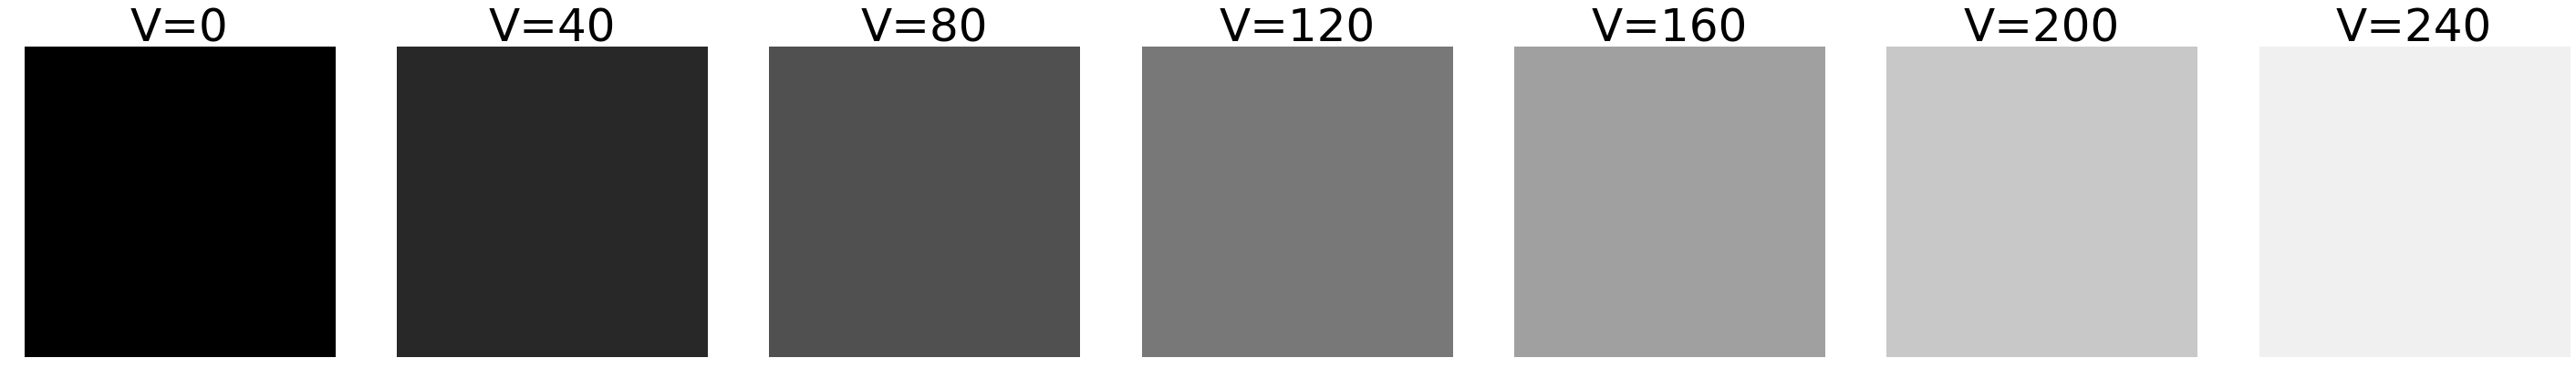

In [10]:
# Value test. 
plt.figure(figsize=(50,50))

for i in range(0,7):
    # Create 50x50 HSV image with all zeros
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)
    
    # Set Hue = 0, Saturation = 0, Value = i x 40
    v = i * 40
    imhsv[:,:,:] = (0, 0, v)
    
    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)

    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('V='+ str(v), fontdict={'fontsize': 50, 'fontweight': 'medium'})



As you can see, **value controls the brightness of the image**. When the value is 0, the image is black and when it is close to 255, the image is white. 

### <font style = "color:rgb(8,133,37)">Saturation Test</font>

In this test, we will set H to 0, V to 128 and vary the saturation from 0 to 240. 


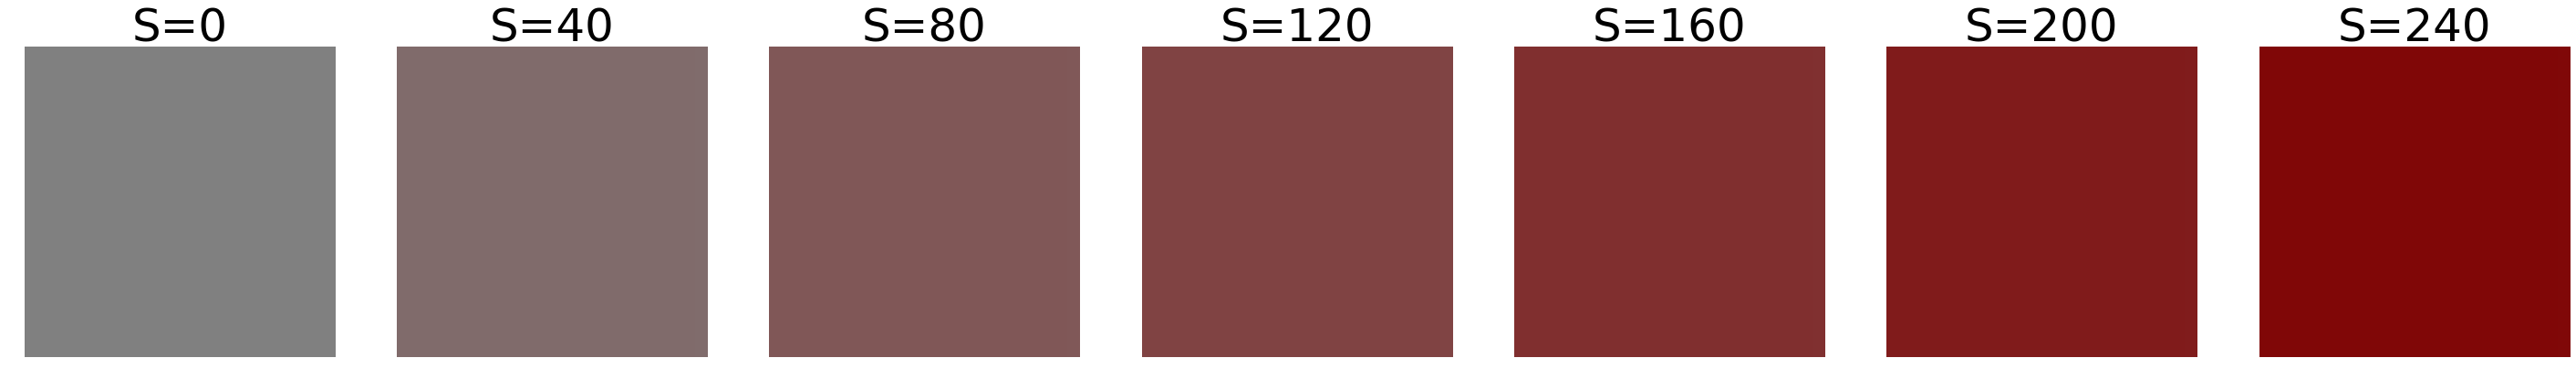

In [10]:
# Saturation test. 
# Set brightness to 128, hue to 0, and change saturation

plt.figure(figsize=(50,50))
for i in range(0,7):
    # Create 50x50 HSV image with all zeros
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)
    
    # Set Hue = 0, Saturation = i * 40, Value = 128
    s = i * 40
    imhsv[:,:,:] = (0, s, 128)

    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)
    
    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('S='+ str(s), fontdict={'fontsize': 50, 'fontweight': 'medium'})



**Conclusion** : Saturation controls how rich a color is. **If the color is faded, it is less saturated. When it is intense and deep, it is more saturated. When the saturation is 0, we lose all color information and the image looks grayscale.**

### <font style = "color:rgb(8,133,37)">Hue Test</font>

In this test, we will set S and V to 128, and vary the Hue from 0 to 180. 


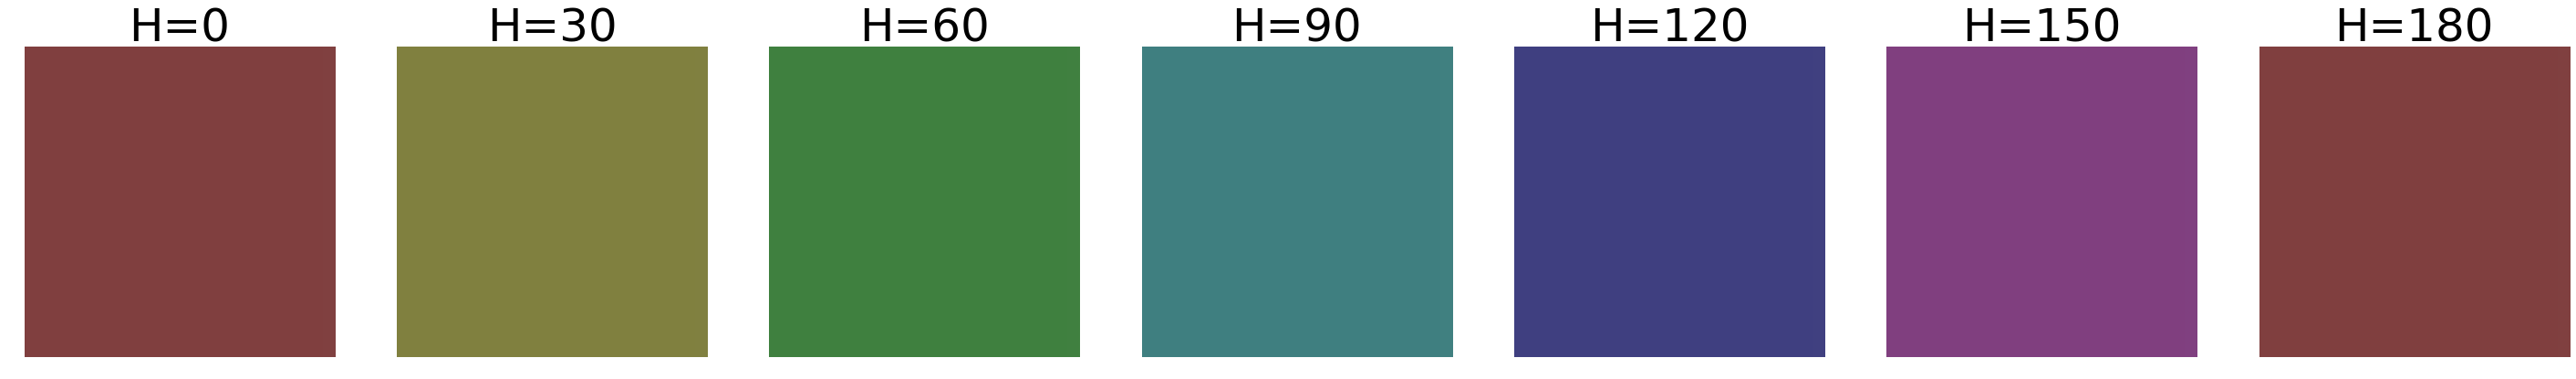

In [11]:
# Hue Test

plt.figure(figsize=(50,50))

for i in range(0,7):
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)

    # Set Hue = i x 30, Saturation = 128, and Value = 128.
    h = i * 30
    imhsv[:,:,:] = ( h, 128, 128)
    
    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)
    
    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('H='+ str(h), fontdict={'fontsize': 50, 'fontweight': 'medium'})


**Conclusion** : Hue controls the perception of color. It is represented as an angle where a hue of 0 is red, green is 120 degrees ( 60 in OpenCV ), and blue is at 240 degrees( 120 in OpenCV ). In OpenCV, Hue is goes from 0 to 180 intensities values where one grayscale intensity change represents 2 degrees. 

Because hue is angle, you get red color for both H = 0 and H = 360 ( or 180 in OpenCV's representation )

# <font style = "color:rgb(50,120,229)">The YCrCb color space</font>

The YCrCb color space is derived from the RGB color space. Its three components are : 

* **Y** (*Luma*), derived from the RGB values of the image

* **Cr** = R - Y (how far is the red component from the Luma, also known as *Red Difference*)

* **Cb** = B - Y (how far is the blue component from the Luma, also known as *Blue Difference*) 

Let us convert the image from BGR to YCrCb and take a look at the three channels.

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from dataPath import DATA_PATH
%matplotlib inline

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [14]:
filename = DATA_PATH + "images/capsicum.jpg"

In [15]:
bgr = cv2.imread(filename)

In [16]:
ycbImage = cv2.cvtColor(bgr, cv2.COLOR_BGR2YCrCb)

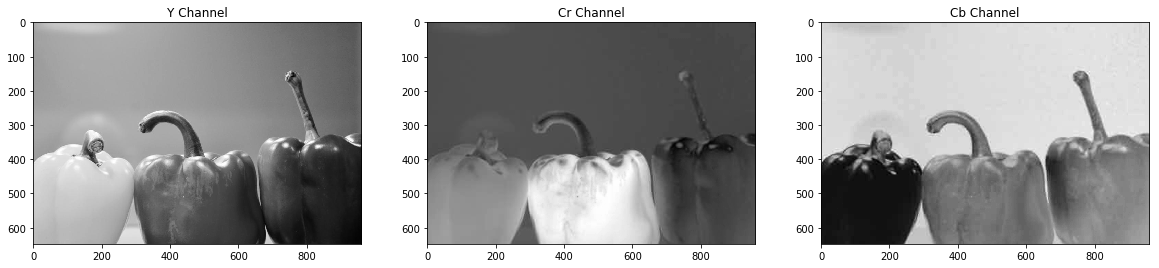

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("Y Channel")
plt.imshow(ycbImage[:,:,0],cmap="gray")
plt.subplot(1,3,2)
plt.title("Cr Channel")
plt.imshow(ycbImage[:,:,1],cmap="gray")
plt.subplot(1,3,3)
plt.title("Cb Channel")
plt.imshow(ycbImage[:,:,2],cmap="gray")
plt.show()

#### <font style = "color:rgb(8,133,37)">Observations </font>
- Y Channel looks similar to a grayscale image. 
- Cr Channel indicates the amount of Red in the image, which is evident from the high values of the middle (red) pepper. Similarly, 
- Cb indicates the amount of Blue in the image, which is why the blue background displays high values.



# <font style = "color:rgb(50,120,229)">The Lab color space</font>

The Lab color space consists of :

* **L**ightness

* **A** (a color component ranging from Green to Magenta) 

* **B** (a color component ranging from Blue to Yellow).

The **L channel encodes brightness, while the A and B channels encode color**. 

The following code shows how to convert from BGR to Lab color space in OpenCV.

In [18]:
# convert from bgr to LAB format
labImage = cv2.cvtColor(bgr, cv2.COLOR_BGR2Lab)

The following figure shows the three channels in grayscale. 
- Lower values in A channel indicate green color and higher values indicate magenta (or red). 
- Similarly, lower values in B channel indicate blue color and higher values indicate yellow color.

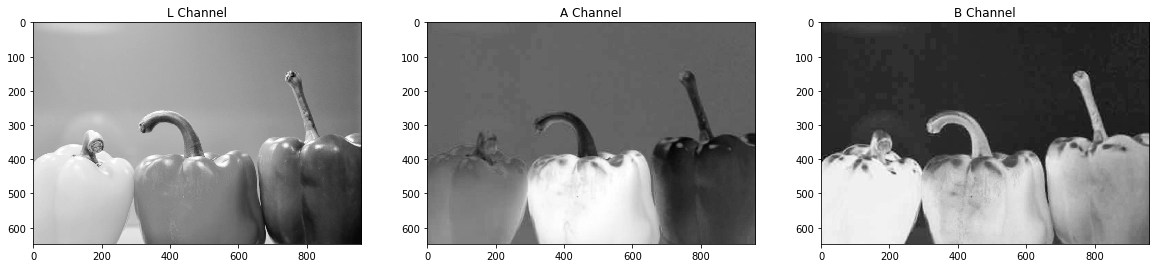

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title("L Channel")
plt.imshow(labImage[:,:,0],cmap="gray")
plt.subplot(1,3,2)
plt.title("A Channel")
plt.imshow(labImage[:,:,1],cmap="gray")
plt.subplot(1,3,3)
plt.title("B Channel")
plt.imshow(labImage[:,:,2],cmap="gray")
plt.show()

#### <font style = "color:rgb(8,133,37)">Observations </font>
- In the **A channel** - the right (green) pepper has lower values and the middle (red) pepper has higher values than everything else. 
- Similarly for **B channel**, the blue background shows low values, and the left (yellow) pepper has high values.